## **Data Clean**

In [4]:
import pandas as pd # Importing pandas library for data manipulation and analysis

In [5]:
# Load data into DataFrame
df1 = pd.read_csv('/Users/zhouxiaoyu/desktop/comics_update/tintin_emotion_pilot_data_cleaned2_04122024.csv')
df2 = pd.read_csv('/Users/zhouxiaoyu/desktop/comics_update/MAST Corpus Organization - MAST.csv')

In [13]:
# Check the columns
print(df1.columns)
print(df2.columns)

Index(['Project Name', 'Document Name', 'Document Directory', 'Page Number',
       'Region ID', 'Annotation ID', 'Taxonomy Path', 'TotalPanels', 'Panel#',
       'ComicOrdinalPanel', 'ComicOrdinal%', 'Valence', 'Arousal',
       'Relative Area(%)', 'Counter', 'Global Region', 'RegionSimplified',
       'Country', 'Title', 'Publication Date', 'Format',
       'BookOriginalLanguage', 'CountryLang', 'LanguageFinal', 'Silent?',
       'Genre Simplified', 'Style', 'StyleCluster'],
      dtype='object')
Index(['%', 'Format', 'Comic_title', 'Untranslated Title', 'Source Title',
       'Author', 'Translator', 'Author_origin', 'Author_country (current)',
       'Global region', 'Country', 'Language',
       'Original Language (Translations)', 'Publisher', 'Genre ',
       'Comic "style"', 'Audience', 'Demographic', 'Publication Date',
       'Pages#', 'Chapters Qty', 'Chapter/Issue#', 'Completed', 'Description',
       'Website', 'CCL', 'Permission', 'File', 'Notes', 'Country again',
       'T

In [18]:
# Remove rows where '2.5.1 Panel Emotions' column has missing values 
df2 = df2.dropna(subset=['2.5.1 Panel Emotions'])
# Verify that all missing values have been removed from '2.5.1 Panel Emotions' column
print(df2_cleaned['2.5.1 Panel Emotions'].isnull().sum())

0


In [59]:
# Check the frequencies
print(df1['Document Name'].value_counts())
print() # Print a blank row to ensure readability
print(df2['Comic_title'].value_counts())

Tintin and the Secret of the Unicorn    237
Vainglorious                            217
The PiRats                              215
Daughter-in-Law (Nuora)                 184
El Loco Chavez: Gato                    172
                                       ... 
Comic Gianchi                             1
Pan i Ples                                1
The Cat                                   1
Cleverman                                 1
Perihan                                   1
Name: Document Name, Length: 353, dtype: int64

6People                  6
Cake                     2
Infection                2
El Manque                2
Hope                     2
                        ..
Le solitaire             1
Antoine                  1
Bon voyage M. Gruchet    1
Mussard                  1
Ngoda Chronicles         1
Name: Comic_title, Length: 750, dtype: int64


In [34]:
merged_df = pd.merge(df1, df2, left_on='Document Name', right_on='Comic_title', how='inner', indicator=True)
print(merged_df['_merge'].value_counts())
print(f"Unique Document Names: {merged_df['Document Name'].nunique()}")
print(f"Unique Comic Titles: {merged_df['Comic_title'].nunique()}")

both          14400
left_only         0
right_only        0
Name: _merge, dtype: int64
Unique Document Names: 270
Unique Comic Titles: 270


In [35]:
# Identify titles that appear multiple times in both datasets to avoid many-to-many relationships during data merging

# Count the frequency of each 'Document Name' in df1 and filter out those appearing only once
multiple_doc_names = df1['Document Name'].value_counts()
multiple_doc_names = multiple_doc_names[multiple_doc_names > 1].index

# Count the frequency of each 'Comic_title' in df2 and filter out those appearing only once
multiple_comic_titles = df2['Comic_title'].value_counts()
multiple_comic_titles = multiple_comic_titles[multiple_comic_titles > 1].index

# Find common titles that appear multiple times in both datasets by taking the intersection of both sets
common_titles = set(multiple_doc_names).intersection(set(multiple_comic_titles))
print("Titles that appear multiple times in both datasets:", common_titles)
print("Number of common titles:", len(common_titles))

Titles that appear multiple times in both datasets: {'Infection'}
Number of common titles: 1


In [36]:
# Identify rows where 'Document Name' in df1 is 'Infection'
infection_indices_df1 = df1[df1['Document Name'] == 'Infection'].index

# Drop these rows from df1
df1_cleaned = df1.drop(infection_indices_df1)

# Confirm deletion by checking if 'Infection' still appears in df1
print('Infection in df1:', 'Infection' in df1_cleaned['Document Name'].values)

# Identify rows where 'Comic_title' in df2 is 'Infection'
infection_indices_df2 = df2[df2['Comic_title'] == 'Infection'].index

# Drop these rows from df2
df2_cleaned = df2.drop(infection_indices_df2)

# Confirm deletion by checking if 'Infection' still appears in df2
print('Infection in df2:', 'Infection' in df2_cleaned['Comic_title'].values)

Infection in df1: False
Infection in df2: False


In [38]:
# Merge the data using an inner join, keeping only rows where 'Document Name' and 'Comic_title' match
merged_df = pd.merge(df1_cleaned, df2_cleaned, left_on='Document Name', right_on='Comic_title', how='inner')

# Display the first few rows of the merged dataframe to ensure it looks correct
print(merged_df.head())

     Project Name          Document Name                Document Directory  \
0  TINTIN Project  The Legend of Tteryel  ee628c6877967dd5e03e59a09a0dccb6   
1  TINTIN Project  The Legend of Tteryel  ee628c6877967dd5e03e59a09a0dccb6   
2  TINTIN Project  The Legend of Tteryel  ee628c6877967dd5e03e59a09a0dccb6   
3  TINTIN Project  The Legend of Tteryel  ee628c6877967dd5e03e59a09a0dccb6   
4  TINTIN Project  The Legend of Tteryel  ee628c6877967dd5e03e59a09a0dccb6   

   Page Number  Region ID  Annotation ID  \
0            1     119909         347010   
1            1     119910         347011   
2            1     119907         347008   
3            1     119906         347007   
4            1     119908         347009   

                                Taxonomy Path  TotalPanels  Panel#  \
0  VLT: Compositional structure (v.4) / Panel        165.0     1.0   
1  VLT: Compositional structure (v.4) / Panel        165.0     2.0   
2  VLT: Compositional structure (v.4) / Panel        165

In [58]:
# Remove all non-alphabet characters to normalize the emotion labels
merged_df['Normalized Emotions'] = merged_df['2.5.1 Panel Emotions'].str.replace(r'[^a-zA-Z]', '', regex=True)

# Print the first few entries of the normalized column to check the results
print(merged_df['Normalized Emotions'].head())

# Recalculate the frequency of each normalized emotion label
normalized_emotion_counts = merged_df['Normalized Emotions'].value_counts()

# Print the frequency counts
print(normalized_emotion_counts)

0    XZ
1    XZ
2    XZ
3    XZ
4    XZ
Name: Normalized Emotions, dtype: object
JW    3977
JB    3175
LZ    3133
SD    2052
XZ    1986
NC      11
Name: Normalized Emotions, dtype: int64


## **Data Analysis**

In [60]:
# Filter for specific emotional labels
specific_people = merged_df[merged_df['Normalized Emotions'].isin(['JW', 'JB', 'LZ', 'SD', 'XZ'])]

# Calculate the median, mean, and standard deviation for Valence and Arousal
valence_arousal_stats = specific_people.groupby('Normalized Emotions').agg({
    'Valence': ['median', 'mean', 'std'],
    'Arousal': ['median', 'mean', 'std']
})

# Print the calculated statistics
print(valence_arousal_stats)

                    Valence                     Arousal                    
                     median      mean       std  median      mean       std
Normalized Emotions                                                        
JB                      0.0 -0.157953  0.446945     2.0  2.328504  0.884362
JW                      0.0 -0.117551  0.454077     2.0  2.273322  1.173129
LZ                     -0.5 -0.143951  0.602803     2.0  2.305458  0.994024
SD                      0.0 -0.184942  0.650006     2.0  2.475146  1.242379
XZ                      0.0 -0.038016  0.695390     3.0  2.770896  1.103865


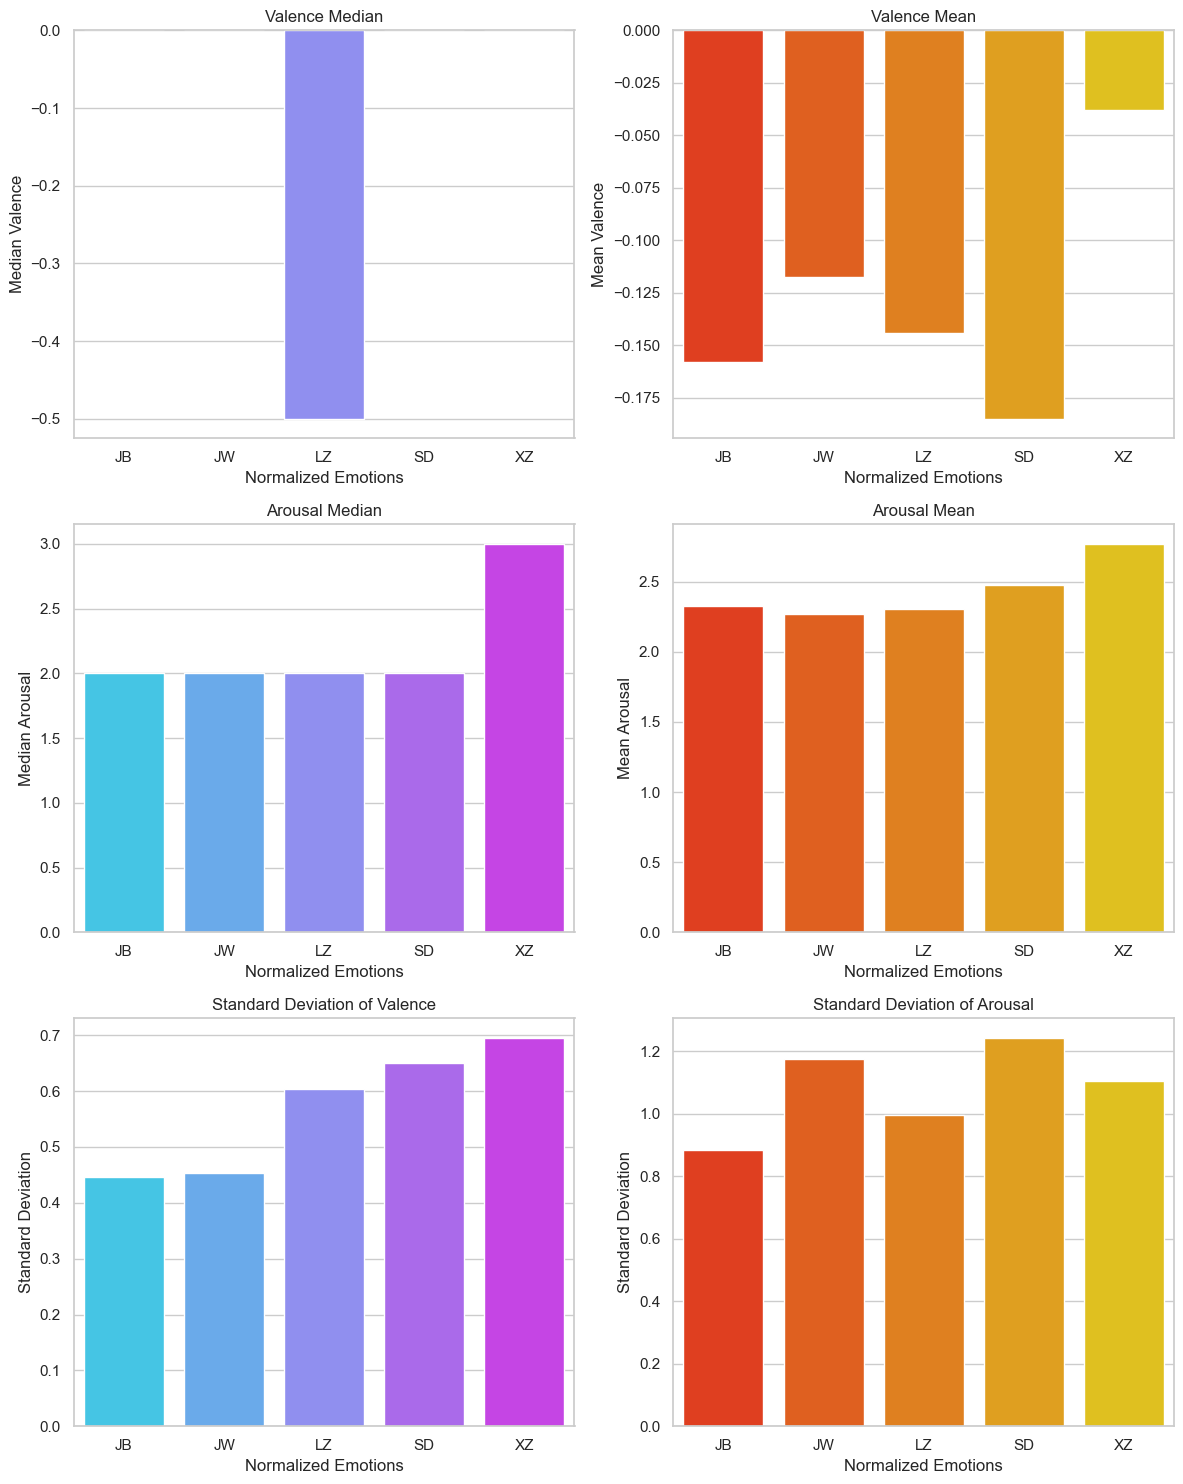

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for better clarity
sns.set(style="whitegrid")

# Create a figure canvas with six subplots (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Valence Median and Mean plots
sns.barplot(x=valence_arousal_stats.index, y=valence_arousal_stats['Valence', 'median'], ax=axs[0, 0], palette='cool')
axs[0, 0].set_title('Valence Median')
axs[0, 0].set_ylabel('Median Valence')

sns.barplot(x=valence_arousal_stats.index, y=valence_arousal_stats['Valence', 'mean'], ax=axs[0, 1], palette='autumn')
axs[0, 1].set_title('Valence Mean')
axs[0, 1].set_ylabel('Mean Valence')

# Arousal Median and Mean plots
sns.barplot(x=valence_arousal_stats.index, y=valence_arousal_stats['Arousal', 'median'], ax=axs[1, 0], palette='cool')
axs[1, 0].set_title('Arousal Median')
axs[1, 0].set_ylabel('Median Arousal')

sns.barplot(x=valence_arousal_stats.index, y=valence_arousal_stats['Arousal', 'mean'], ax=axs[1, 1], palette='autumn')
axs[1, 1].set_title('Arousal Mean')
axs[1, 1].set_ylabel('Mean Arousal')

# Valence and Arousal Standard Deviation plots
sns.barplot(x=valence_arousal_stats.index, y=valence_arousal_stats['Valence', 'std'], ax=axs[2, 0], palette='cool')
axs[2, 0].set_title('Standard Deviation of Valence')
axs[2, 0].set_ylabel('Standard Deviation')

sns.barplot(x=valence_arousal_stats.index, y=valence_arousal_stats['Arousal', 'std'], ax=axs[2, 1], palette='autumn')
axs[2, 1].set_title('Standard Deviation of Arousal')
axs[2, 1].set_ylabel('Standard Deviation')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


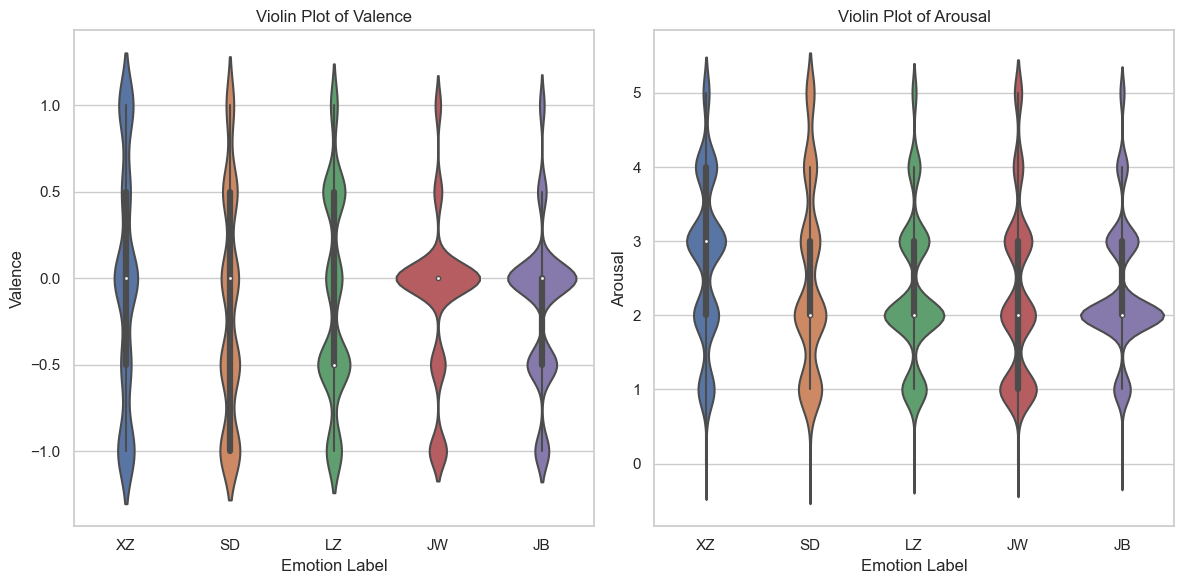

In [65]:
# Creating violin plots for Valence and Arousal
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(x='Normalized Emotions', y='Valence', data=specific_people, ax=axs[0])
axs[0].set_title('Violin Plot of Valence')
axs[0].set_ylabel('Valence')
axs[0].set_xlabel('Emotion Label')

sns.violinplot(x='Normalized Emotions', y='Arousal', data=specific_people, ax=axs[1])
axs[1].set_title('Violin Plot of Arousal')
axs[1].set_ylabel('Arousal')
axs[1].set_xlabel('Emotion Label')

plt.tight_layout()
plt.show()


Text(46.73476851851851, 0.5, 'Arousal')

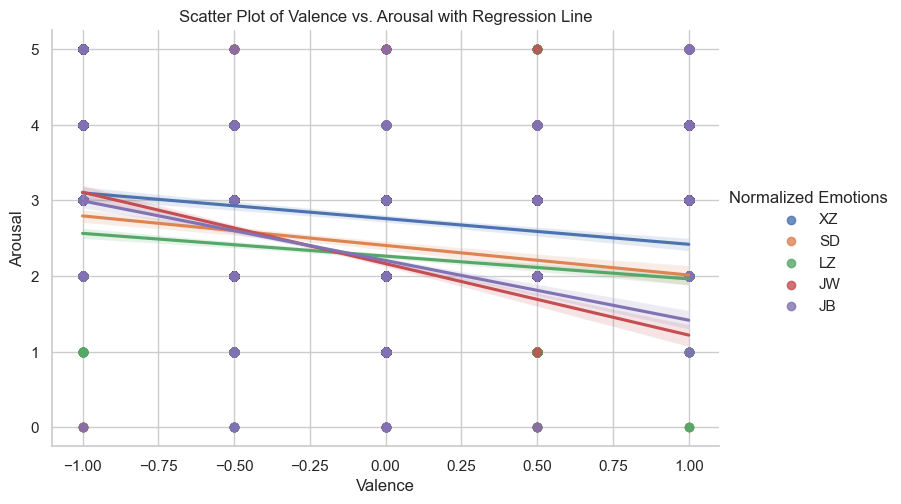

In [70]:
# Scatter plot with a fitted regression line
sns.lmplot(x='Valence', y='Arousal', hue='Normalized Emotions', data=specific_people, aspect=1.5)
plt.title('Scatter Plot of Valence vs. Arousal with Regression Line')
plt.xlabel('Valence')
plt.ylabel('Arousal')
